Imports

In [1]:
#Import all of the necessary packages
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from IPython.html.widgets import interact, fixed
import ipywidgets as widgets
import io

font_plt = {'family': 'serif',
            'color':  'darkred',
            'weight': 'normal',
            'size': 10,
            }
font_plt_ax = {'family': 'serif',
               'color':  'black',
               'weight': 'normal',
               
               'size': 10,
              }
import sys
sys.path.append("../.")
import glob #glob is helpful for searching for filenames or directories
import ddm_clean as ddm #this is the module containing the differential dynamic microscopy code
import scipy #scientific python
from scipy.signal import blackmanharris as bh #for Blackman-Harris windowing
import pickle #for saving data
from scipy.special import gamma
import mpld3

C:\Users\Student\Anaconda2\lib\site-packages\IPython\html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)
../.\tiff_file.py:1995: UserWarning: failed to import _tifffile.decodepackbits
  warnings.warn("failed to import %s" % module_function)
../.\tiff_file.py:1995: UserWarning: failed to import _tifffile.decodelzw
  warnings.warn("failed to import %s" % module_function)
../.\tiff_file.py:1995: UserWarning: failed to import _tifffile.unpackints
  warnings.warn("failed to import %s" % module_function)


Pick Which Videos and ROIs You Want

In [2]:
##Dilute
data_dir1 = "Z:\\ChristelleSummer2018\\Data\\BeadsInConditions\\Dilute\\2018_07_09\\9.5\\2018_07_09Dilute9.5fps_3\\"
datafile1 ="AllResults.p"

frame_rate1 = 9.5
f = open(data_dir1+datafile1,'rb')
AllResults1 = pickle.load(f)
f.close()

##Tub

data_dir2 = "Z:\\ChristelleSummer2018\\Data\\BeadsInConditions\\Tubulin\\2018_07_17\\40\\tub40fps_1\\"
datafile2 ="AllResultsTub40fps_1.p"

frame_rate2 = 40.0
g = open(data_dir2+datafile2,'rb')
AllResults2 = pickle.load(g)
g.close()

##Actin

data_dir3 = "Z:\\ChristelleSummer2018\\Data\\BeadsInConditions\\Actin\\2018_07_17\\40\\Actin40fps_3\\"
datafile3 ="AllResultsActin40fps717_3.p"

frame_rate3 = 40.0
h = open(data_dir3+datafile3,'rb')
AllResults3 = pickle.load(h)
h.close()

##Copoly
data_dir4 = "Z:\\ChristelleSummer2018\\Data\\BeadsInConditions\\Copolymerized\\2018_07_17\\40\\copoly40fps_1\\"
datafile4="AllResultsCopoly40fps_1.p"

frame_rate4 = 40.0
i = open(data_dir4+datafile4,'rb')
AllResults4 = pickle.load(i)
i.close()



Saving all at once

In [3]:
Sample1={}
Sample2 ={}
Sample3 ={}
Sample4 ={}


In [4]:
##DILUTE
ROIs = ['0','128','256','512','640']
for i in range(len(ROIs)):
    ROIindex = i
    ROI = ROIs[ROIindex]
    
    fitparamsA = AllResults1['fitparams'+str(ROI)]
    theoryA = AllResults1['theory'+str(ROI)]
    chiA = AllResults1['chi2'+str(ROI)]
    
    ddmdatafile1 = '2018_07_09Dilute9.5fps_3_MMStack_Pos0.ome_'+str(ROI)+'_128x128_FFTDIFFS_dts_ravs.p'
    
    g = open(data_dir1+ddmdatafile1,'rb')
    dat = pickle.load(g)
    g.close()

    # dat = pickle.load(open(DDMdata_dir1+ddmdatafile,'r'))
    Sample1['dts'+ROIs[i]]  = dat['dts']
    Sample1['ravs'+ROIs[i]] = dat['ravs']
    Sample1['ffts'+ROIs[i]] = dat['ffts']
    Sample1['times'+ROIs[i]]= dat['dts']/frame_rate1
    
    
    

In [5]:
##Tubulin

ROIs = ['0','256','512']
for i in range(len(ROIs)):
    ROIindex = i
    ROI = ROIs[ROIindex]
    
    fitparamsB = AllResults2['fitparams'+str(ROI)]
    theoryB = AllResults2['theory'+str(ROI)]
    chiB = AllResults2['chi2'+str(ROI)]
    
    ddmdatafile2 = 'tub40fps_1_MMStack_Pos0.ome_'+str(ROI)+'_256x256_FFTDIFFS_dts_ravs.p'
    
    g = open(data_dir2+ddmdatafile2,'rb')
    dat = pickle.load(g)
    g.close()

    # dat = pickle.load(open(DDMdata_dir1+ddmdatafile,'r'))
    Sample2['dts'+ROIs[i]]  = dat['dts']
    Sample2['ravs'+ROIs[i]] = dat['ravs']
    Sample2['ffts'+ROIs[i]] = dat['ffts']
    Sample2['times'+ROIs[i]]= dat['dts']/frame_rate2
    
    
    

In [6]:
##Actin
ROIs = ['0','128','256','384','512','640']
for i in range(len(ROIs)):
    ROIindex = i
    ROI = ROIs[ROIindex]
    
    fitparamsC = AllResults3['fitparams'+str(ROI)]
    theoryC = AllResults3['theory'+str(ROI)]
    chiC = AllResults3['chi2'+str(ROI)]
    
    ddmdatafile3 = 'Actin40fps_3_MMStack_Pos0.ome_'+str(ROI)+'_128x128_FFTDIFFS_dts_ravs.p'
    
    g = open(data_dir3+ddmdatafile3,'rb')
    dat = pickle.load(g)
    g.close()

    # dat = pickle.load(open(DDMdata_dir1+ddmdatafile,'r'))
    Sample3['dts'+ROIs[i]]  = dat['dts']
    Sample3['ravs'+ROIs[i]] = dat['ravs']
    Sample3['ffts'+ROIs[i]] = dat['ffts']
    Sample3['times'+ROIs[i]]= dat['dts']/frame_rate3
    

In [7]:
##Copoly
ROIs = ['0','256','512']
for i in range(len(ROIs)):
    ROIindex = i
    ROI = ROIs[ROIindex]

    fitparamsD = AllResults4['fitparams'+str(ROI)]
    theoryD = AllResults4['theory'+str(ROI)]
    chiD = AllResults4['chi2'+str(ROI)]
    
    ddmdatafile4 = 'copoly40fps_1_MMStack_Pos0.ome_'+str(ROI)+'_256x256_FFTDIFFS_dts_ravs.p'
    
    h = open(data_dir4+ddmdatafile4,'rb')
    dat = pickle.load(h)
    h.close()

    # dat = pickle.load(open(DDMdata_dir1+ddmdatafile,'r'))
    Sample4['dts'+ROIs[i]]  = dat['dts']
    Sample4['ravs'+ROIs[i]] = dat['ravs']
    Sample4['ffts'+ROIs[i]] = dat['ffts']
    Sample4['times'+ROIs[i]]= dat['dts']/frame_rate4
    

In [8]:
Sample1.keys()

['ravs128',
 'dts512',
 'dts256',
 'dts0',
 'ffts640',
 'times0',
 'times512',
 'ravs0',
 'ravs256',
 'times128',
 'times256',
 'dts640',
 'dts128',
 'ffts512',
 'ravs640',
 'ffts0',
 'ffts256',
 'ffts128',
 'times640',
 'ravs512']

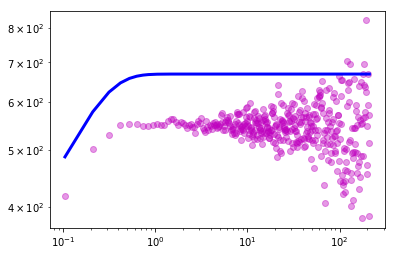

In [12]:
# mpld3.disable_notebook()
# %matplotlib qt5
ROIs = [0]
col = ['mo','co','yo','ro','co','yo']
q_index = 20
imDimension= 128
px = .196
# q256 = np.arange(0,256/2)*2*np.pi*(1./(256*px))
q = np.arange(0,128/2)*2*np.pi*(1./(128*px))
for i in range(len(ROIs)):
    ROI = ROIs[i]
    times1 = Sample1['times'+str(ROIs[i])]
    ravs1= Sample1['ravs'+str(ROIs[i])]
    times2 = Sample2['times'+str(ROIs[i])]
    ravs2= Sample2['ravs'+str(ROIs[i])]
    times3 = Sample3['times'+str(ROIs[i])]
    ravs3= Sample3['ravs'+str(ROIs[i])]
    times4 = Sample4['times'+str(ROIs[i])]
    ravs4= Sample4['ravs'+str(ROIs[i])]
  
   ##DILUTE 
    plt.loglog(times1,ravs1[:,q_index],col[0],alpha=0.4, label = 'ROI %i, TC %.3f,Bcg %.2f,StretchingExponent %.2f'
               %(ROIs[i], fitparamsA[q_index][1], fitparamsA[q_index][2] ,fitparamsA[q_index][3] ))
    plt.loglog(times1[:len(theoryA[q_index,:])], theoryA[q_index,:], '-b',lw=3)
    
#     plt.loglog(times2,ravs2[:,q_index],col[1],alpha=0.4, label = 'ROI %i, TC %.3f,Bcg %.2f,StretchingExponent %.2f'
#                %(ROIs[i], fitparamsB[q_index][1], fitparamsB[q_index][2] ,fitparamsB[q_index][3] ))
#     plt.loglog(times2[:len(theoryB[q_index,:])], theoryB[q_index,:], '-b',lw=3)
    
#     plt.loglog(times3,ravs3[:,q_index],col[2],alpha=0.4, label = 'ROI %i, TC %.3f,Bcg %.2f,StretchingExponent %.2f'
#                %(ROIs[i], fitparamsC[q_index][1], fitparamsC[q_index][2] ,fitparamsC[q_index][3] ))
#     plt.loglog(times3[:len(theoryC[q_index,:])], theoryC[q_index,:], '-b',lw=3)
    
#     plt.loglog(times4,ravs4[:,q_index],col[3],alpha=0.4, label = 'ROI %i, TC %.3f,Bcg %.2f,StretchingExponent %.2f'
#                %(ROIs[i], fitparamsD[q_index][1], fitparamsD[q_index][2] ,fitparamsD[q_index][3] ))
#     plt.loglog(times4[:len(theoryD[q_index,:])], theoryD[q_index,:], '-b',lw=3)
    
# plt.title('q_index of %i.q = %.3f 1/$\mu$m' %(q_index, q[q_index]))
# plt.xlabel("Time (s)")
# plt.legend()


    